# Lecture 3: Conditions, Loops, and Functions
ENVR 890-001: Python for Environmental Research, Fall 2020

August 28, 2020

By Andrew Hamilton. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Summary
In this lecture, we will first learn about importing Python **modules/packages**. We will then learn about using **conditional rules** to execute different tasks under different conditions, and using **loops** to perform repetitive tasks more efficiently. Lastly, we will learn how to build **functions**.

## Importing modules
Python comes standard with a number of [built-in functions](https://docs.python.org/3/library/functions.html) and [classes](https://docs.python.org/3/library/stdtypes.html), which can be used in any program. Built-in functions include ``print()``, ``len()``, ``type()``, and ``str()``, while built-in classes include types and data structures such as ``int`` and ``list``. In addition to these built-in functions, there are a huge number of Python **modules**, which are collections of useful functions and classes that can be **imported** into any program. Many of these modules are included in the standard Python 3 installation. For example, the [``math``]((https://docs.python.org/3/library/math.html) module includes a variety of helpful mathematical constants and functions:

In [1]:
import math

In [2]:
# pi is a constant
print( math.pi )

3.141592653589793


In [3]:
# factorial is a function, meaning we enclose its argument in parentheses
print( math.factorial(10) )

3628800


In addition, there are many useful **packages**, or collections of modules, which are not part of the standard Python 3 library but can be installed and imported into any program. Many of the most useful packages for data analysis and scientific computing have already been added automatically when we installed the Anaconda distribution. For example, the ``Matplotlib`` package is the most common plotting library for Python, and its ``pyplot`` module for plotting is typically imported using the **alias** (nickname) of ``plt`` as follows:

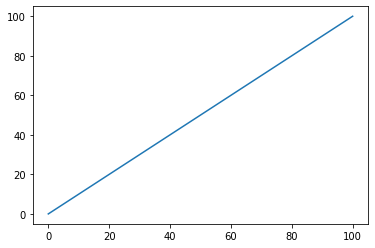

In [4]:
import matplotlib.pyplot as plt

# plot a line
pt1 = (0, 0)
pt2 = (100, 100)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

We will learn more about plotting using Matplotlib in a couple of weeks, and other modules and packages will be introduced throughout the course.

## Conditional rules
### Motivation
At a basic level, a computer program consists of a list of instructions that we want the computer to perform. Often, these instructions are **conditional rules**, wherein we want to perform one operation if a particular statement is true, and a different operation if the statement is false. 

For example, in my research I work with simulation models for reservoir operations. In such a model (as in real life), the amount of water released from the reservoir depends on whether we are in "flood operations", "drought operations", or "normal operations" mode. Thus, at a basic level, we want our code to do something like this each day:

    1. Measure the water stored in the reservoir, S

    2. If S is above an upper threshold, release a lot of water, determined by "flood" operating rules

    3. Else, if S is below a lower threshold, release a small amount of water, determined by "drought" operating rules

    4. Else, release a medium amount of water, determined by "normal" operating rules

A computer program can be though of like a tree, with different branches emerging at each new conditional rule. As we move through the program, we climb up the tree along a particular path determined by the truth values of the different conditional statements.

<img src="lec3_tree.jpg" style="width: 700px;" />

### Operators
**Operators** in a computer program are used to perform operations on variables and values. The simplest example are the **arithmetic operators** such as ``+`` and ``**``. However, there are also many operators which are used to calculate the truth or falsity of a statement. For each of the examples given below, the output of the operator is a boolean value (True or False). A full list of Python operators can be found [here](https://www.w3schools.com/python/python_operators.asp).

**Comparison operators** are used to compare two values:

In [5]:
x = 1
y = 1
z = 2

# == : are the values equal?
print( x == y )
print( x == z )

True
False


In [6]:
truth = (x == y)
print(truth, type(truth))

True <class 'bool'>


In [7]:
## != : not equal?
print( x != y )
print( x != z )

False
True


In [8]:
## > : greater than
## < : less than
## >= : greater than or equal to
## <= : less than or equal to
print( x > y )
print( x > z )
print( x < z )
print( x >= y )
print( x >= z )

False
False
True
True
False


**Logical operators** are used to combine two conditional statements:

In [9]:
## and : are both statements true?
## or : is at least one of the statements true?
print( x == y  and x < z )

True


In [10]:
print( x >= z  or y == x )

True


In [11]:
## not : reverse the result
print( not(x == y  and x < z) )
print( not(x >= z  or y == z) )

False
True


We can also do sequences of more than two conditions, but **order of operations is important here**: ``and`` takes precedence over ``or``. See the expanded order of operations (beyond PEMDAS) [here](https://www.programiz.com/python-programming/precedence-associativity). It is generally a good idea to use parentheses liberally when you are dealing with multiple logical operations, to make sure you are actually testing what you think you are testing!

In [12]:
## say we are reservoir operators, and need to know whether minimum flow requirements for Chinook salmon 
## in California are currently important (assume these are active when flood operations occur either in winter and spring)
operations = 'drought'
season = 'winter'

## which is correct?
min_flow_required = season == 'winter' or season == 'spring' and operations == 'flood'
print(min_flow_required)
min_flow_required = operations == 'flood' and season == 'winter' or season == 'spring'
print(min_flow_required)

True
False


In [13]:
## use parentheses so you don't have to worry about the order
min_flow_required = (season == 'winter' or season == 'spring') and operations == 'flood'
print(min_flow_required)
min_flow_required = operations == 'flood' and (season == 'winter' or season == 'spring')
print(min_flow_required)

False
False


**Membership operators** can check whether an element (or sequence of elements) are present in an object.

In [14]:
l = list(range(10))
x = 3
y = 20
print( x in l )
print( y in l )
print( y not in l )

True
False
True


This gives us an easier way to calculate whether minimum flows are required:

In [15]:
min_flow_required = operations == 'flood' and season in ['winter', 'spring']
print(min_flow_required)

False


### If statements
Now that we have a knowledge of operators, we can write conditional rules in Python using **if statements**, as follows:

In [16]:
age = 30
birthday = "1/14"
today = "8/14"

if today == birthday:
    age += 1

    print( f'Happy birthday, you are now {age}!')

Note that **white space is important in Python**. The conditional code to be executed must be indented (traditionally 1 tab or four spaces). The if statement ends when the indentation ends.

**If-else statements** can be used to execute different instructions for True and False values:

In [17]:
age = 30
birthday = "1/1"
today = "8/14"

if today == birthday:
    age += 1
    print( f'Happy birthday, you are now {age}!')
else:
    print( f'Sorry, you are still {age} :(')    

Sorry, you are still 30 :(


And to test multiple cases, we can use **if-elif-else statements**:

In [18]:
age = 30
birthday = "8/14"
today = "8/14"
tomorrow = "8/15"

if today == birthday:
    age += 1
    print( f'Happy birthday, you are now {age}!')
elif tomorrow == birthday:
    age += 1
    print( f'Wow, you turn {age} tomorrow!')
else:
    print( f'Sorry, you are still {age} for at least two days :(')    

Happy birthday, you are now 31!


A computer program will often contain **nested statements** to create the tree-branch structure we saw above:

In [19]:
age = 50
birthday_sadness_threshold = 49
birthday = "8/14"
today = "8/14"
tomorrow = "8/15"

if age < birthday_sadness_threshold:
    if today == birthday:
        age += 1
        print( f'Happy birthday, you are now {age}!')
    elif tomorrow == birthday:
        age += 1 
        print( f'Wow, you turn {age} tomorrow!')
    else:
        print( f'Sorry, you are still {age} :(')  
else:
    if today == birthday:
        age += 1
        print( f'Ugh, another year around the sun. You are now {age}, gross!')
    elif tomorrow == birthday:
        age += 1
        print( f'Enjoy your last day of being {age - 1}, you turn super old ({age}!) tomorrow.')
    else:
        print( f'Hooray, you are still {age} for at least two days :)')  

Ugh, another year around the sun. You are now 51, gross!


### In-class exercise:
Use nested if-elif-else statements to complete the code below, so that it outputs releases consistent with the following conditional rules:

<img src="lec3_tree2.jpg" style="width: 700px;" />

In [20]:
## change the storage, forecast, and season, to make sure you get the correct answer for all combinations
storage = 'drought'  # can be 'flood', 'normal', or 'drought'
forecast = 'dryy'   # can be 'wet' or 'dry'
season = 'spring'  # can be 'winter', 'spring', 'summer', or 'fall'

## set initial value for release that doesn't make sense, so we know something is wrong if we get this answer
release = -1

if storage == 'flood':
    if forecast == 'wet':
        release = 1000    

print( f'Release = {release} cfs')

Release = -1 cfs


## Loops
Loops are one of the most important tools in a programmer's toolbox. A loop allows us to perform repetitive tasks with much less effort.

### For loops
The **for loop** is the most common type of loop in Python. It allows us to **iterate** over the items in an **iterable object**, and perform the same task for each one. One common example of an iterable object is the ``range`` iterator, which will output values in a sequence:

In [21]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


We can also iterate directly over the items in a data structure, such as a list:

In [22]:
for s in ['earth', 'air', 'fire', 'water']:
    print(s)

earth
air
fire
water


In [23]:
l = list(range(10))
print(l)
for i in l:
    print(i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
1
2
3
4
5
6
7
8
9


Lastly, it is often helpful to have both the element and the index when iterating. We can do this with **enumerate**:

In [24]:
states = ['Florida', 'Louisiana', 'California', 'North Carolina']
abbreviations = ['FL', 'LA', 'CA', 'NC']

for i, state in enumerate(states):
    print(i+1, state, abbreviations[i])

1 Florida FL
2 Louisiana LA
3 California CA
4 North Carolina NC


One use of for loops is to perform computations over one or more lists. For example, we can get the first ten square integers as follows:

In [25]:
l = list(range(1, 11))
for i in range(len(l)):
    l[i] **= 2
print(l)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


We can also use for loops to create new lists from scratch, using the **append** function of lists:

In [26]:
l = []
for i in range(1, 11):
    square = i **2
    l.append(square)
print(l)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


### While loops
The other type of loop in Python is the **while loop**, which is used to repeat an operation until a certain boolean condition is met.

In [27]:
## This will perform the same operation as our first for loop
count = 0
while count < 10:
    print(count)
    count += 1

0
1
2
3
4
5
6
7
8
9


While loops are preferable to for loops when we don't know how many iterations something will take. 

For example, suppose we want to get all of the Fibonacci numbers that are less than 200. The Fibonacci sequence is defined through the following recurrence relation:

$$F_n = F_{n-1} + F_{n-2}$$

For example, the sequence begins ``0, 1, 1, 2, 3, 5, 8, ...``. We can use a while loop to accomplish our task:

In [28]:
## set up with first two numbers, 0 and 1
fib = [0, 1]
threshold = 200

## perform while loop until we pass threshold, adding each to list
continue_loop = True
while continue_loop:
    new_fib = fib[-1] + fib[-2]
    if (new_fib < threshold):
        fib.append(new_fib)
    else:
        continue_loop = False
    
## print using the variables as they are when we exit loop
print(f'Fibonacci numbers under {threshold}: {fib}')
print(f'Number of Fibonacci numbers under {threshold}: {len(fib)}')

Fibonacci numbers under 200: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
Number of Fibonacci numbers under 200: 13


### In-class exercise
The [``random`` module](https://docs.python.org/3/library/random.html) has some nice functions for random sampling. For example, we can flip a weighted coin that comes up "heads" 90% of the time as follows:

In [29]:
import random
HorT = random.choices(['H', 'T'], weights = [0.9, 0.1])[0]
print(HorT)

H


First, use a while loop to flip the coin until the first tails occurs, storing each outcome (including the final tails) in a list called ``l``

Now use a for loop to perform 100 trials of this experiment and get the average length of this list. Remember that the mean of a set of numbers is equal to $(a_1 + a_2 + ... + a_N) / N$.

The theoretical answer to this problem is given by the [expected value of a geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution#Expected_Value_Examples), allowing us to check our answer. The expected number of flips should be given by the simple formula $(1-p)/p + 1 = (1-0.1)/0.1 + 1 = 10$.

A good example of the Law of Large Numbers can be seen by rerunning your code multiple times for different numbers of trials. As you increase the number of trials, the estimated average should become closer to the mean and less variable.

## Functions
We have used a number of functions already in this course, including built-in functions, such as ``len()``, and imported functions from modules, such as ``random.choices()``. In this section, we will learn how to build our own functions.

At a basic level, a function in Python is anything that takes some number of inputs (although this number could be zero), performs some operations, and returns some number of outputs (although this number could also be zero). Before it can be used, a function must be **defined** using a ``def`` statement. For example, a simple function that takes no inputs and returns no outputs is a custom print function:

In [30]:
def hello_world():
    print ('Hello world!')

Now this function can be run by writing it with empty parentheses:

In [31]:
hello_world()

Hello world!


A more interesting function will take some **arguments** (inputs) inside the parentheses, which affect the execution of the function:

In [32]:
def hello_name_age(name, age):
    s = f'Hello {name}, you are {age:,} years old!'
    print(s)

hello_name_age('Earth', 4.543e9)

Hello Earth, you are 4,543,000,000.0 years old!


We can also specify the **default** for a variable in a Python function:

In [33]:
def hello_name_age(name = 'Earth', age = 4.543e9):
    s = f'Hello {name}, you are {age:,} years old!'
    print(s)

hello_name_age()

Hello Earth, you are 4,543,000,000.0 years old!


In [34]:
hello_name_age('Betelgeuse', 10.01e9)

Hello Betelgeuse, you are 10,010,000,000.0 years old!


The previous function takes arguments (inputs) but does not have any **return values** (outputs). However, commonly we will want to return values to use outside of the function body. For example, we can rewrite our Fibonacci code above using a function:

In [35]:
def fibonacci_under_threshold(threshold):
    fib = [0, 1]

    ## perform while loop until we pass threshold, adding each to list
    continue_loop = True
    while continue_loop:
        new_fib = fib[-1] + fib[-2]
        if (new_fib < threshold):
            fib.append(new_fib)
        else:
            continue_loop = False
    
    return fib

In [36]:
fibonacci_under_threshold(200)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

When we run the function with the threshold 200, the list ``fib`` is outputted. We can now use this function to directly set the value of variables outside of the function.

In [37]:
f200 = fibonacci_under_threshold(200)
print(f200)
print()

f1000 = fibonacci_under_threshold(1000)
print(f1000)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


In [38]:
n = len(f1000) - len(f200)
print( f'There are {n} Fibonacci numbers between 200 and 1000.')

There are 4 Fibonacci numbers between 200 and 1000.


This introduces the concept of **scope**. A variable created within a Python function is only defined within the body of that function. For example:

In [39]:
def hypotenuse(side_a, side_b):
    side_c = math.sqrt(side_a **2 + side_b **2)
    return side_c

In [40]:
c = hypotenuse(3, 4)
print(c)

5.0


The variable $c$ is accessible because it was declared in the scope of the main body (i.e., no indentation). However, we cannot access the variables ``side_a``, ``side_b`` or ``side_c`` because they are only defined in the scope of the ``hypotenuse()`` function.

In [41]:
# print(side_a, side_b, side_c)

Similarly, if you declare variables with the same name in two different scopes, the code executed within each scope will refer to the variable in the appropriate scope. For example:

In [42]:
x = 3

def square(x):
    x **= 2
    return x

y = square(x)

print(x, y)

3 9


In the example above, the value of ``x`` in the main body remains equal to 3, even after we square ``x`` within the function. The reason is that these are two separate variables in two separate scopes.

However, if a variable name is used within a function without being defined in that function, Python will next search for the variable in the main body.

In [43]:
x = 3

def multiply_by_x(y):
    return y * x

z = multiply_by_x(4)

print(x, z)

3 12


In more complex programs, it is common to have functions within functions, so that the scope is **nested**. In this case, the Python interpreter will move outwardly one function at a time until the variable name is found. This can get confusing, so it is best practice to pass the variables you will need into the function of interest so that the function body remains the proper scope for all variables used within it.

In [44]:
def multiply_x_by_y_squared(x,y):
    z = square(y)
    return x * z

x = 3
y = 5
z = multiply_x_by_y_squared(x, y)

print(x, y, z)

3 5 75


### In-class exercise
Using the code from the first exercise, create a function that takes the ``storage``, ``forecast``, and ``season`` as arguments, and returns the proper ``release`` from the reservoir. 